In [1]:
%matplotlib inline
import skimage.io
import skimage.morphology
import matplotlib.pyplot as plt

import os.path
import os

import sys
sys.path.insert(0, '/home/jr0th/github/segmentation/code/')

import helper.metrics
import helper.model_builder

import numpy as np

import tensorflow as tf
import keras

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

Using TensorFlow backend.


In [2]:
debug = True

In [3]:
cell_min_size = 10**2
boundary_boost_factor = 1

In [4]:
dir_images = "/home/jr0th/github/segmentation/data/BBBC022/test/x_big/"

tag = "DL_on_Hand_8"

out_dir_probmap = "/home/jr0th/github/segmentation/experiments/DL_on_Hand/" + tag + "/probmap/"
out_dir_label = "/home/jr0th/github/segmentation/experiments/DL_on_Hand/" + tag + "/segm/"

weights_path = '/home/jr0th/github/segmentation/checkpoints/' + tag + '/checkpoint_0199.hdf5'

# GET PREDICTIONS

In [5]:
# build session running on GPU 1
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "2"
session = tf.Session(config = configuration)

# apply session
keras.backend.set_session(session)

In [6]:
batch_size = 10

bit_depth = 8

imagebuffer = skimage.io.imread_collection(dir_images + '*.png')
images = imagebuffer.concatenate()

dim1 = images.shape[1]
dim2 = images.shape[2]

images = images.reshape((-1, dim1, dim2, 1))

# preprocess
images = images / 255

# build model and laod weights
model = helper.model_builder.get_model_3_class(dim1, dim2)
model.load_weights(weights_path)

predictions = model.predict(images, batch_size = 10)

print(predictions.shape)

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

(50, 520, 696, 3)


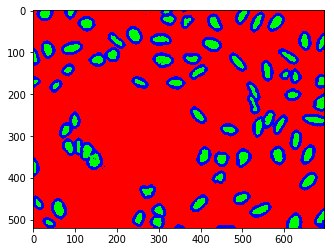

In [7]:
# print one prediction for debug purposes
if(debug):
    plt.imshow(predictions[42].squeeze())
    plt.show()

IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png


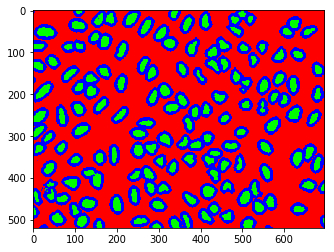

/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


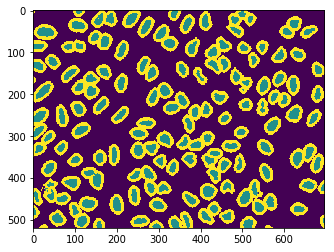

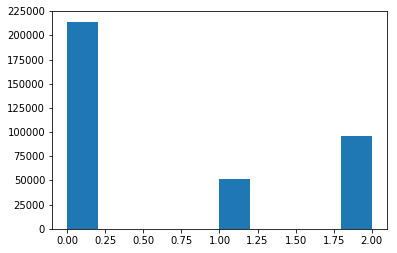

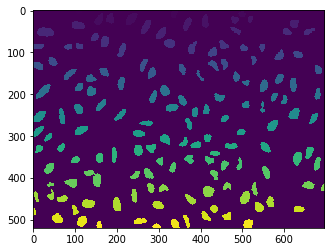

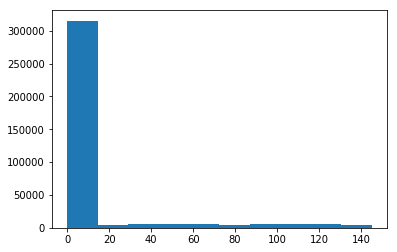

IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png is a low contrast image
  warn('%s is a low contrast image' % fname)


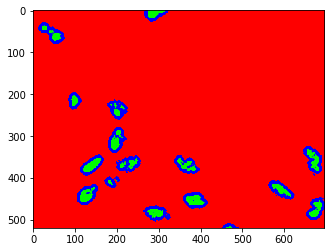

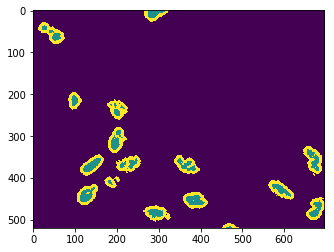

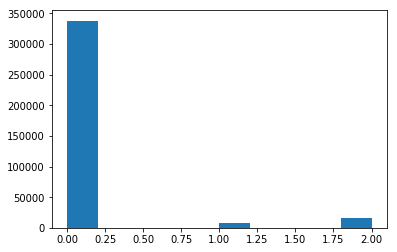

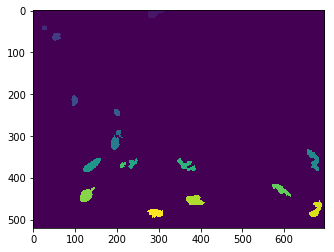

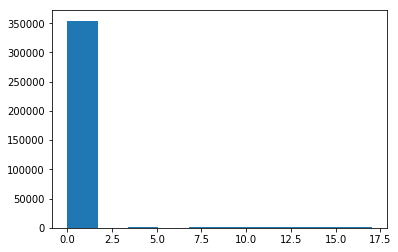

IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


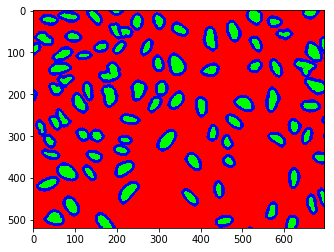

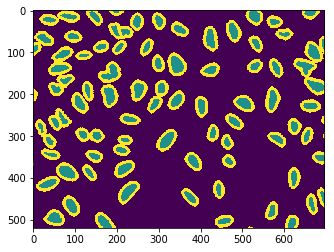

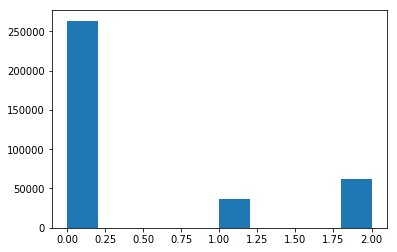

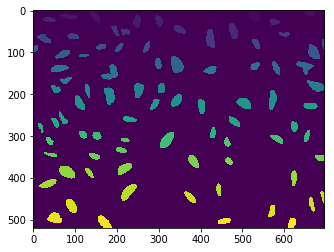

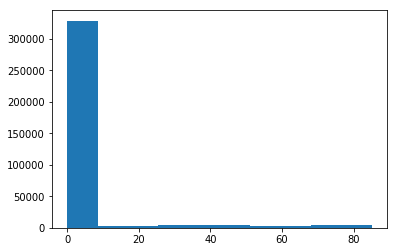

IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png is a low contrast image
  warn('%s is a low contrast image' % fname)


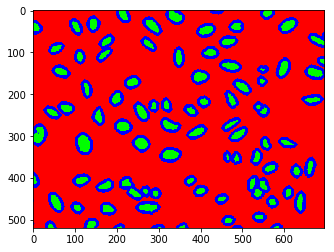

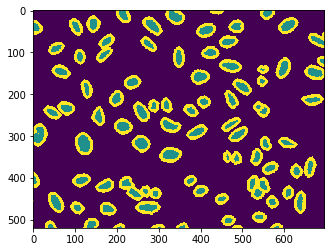

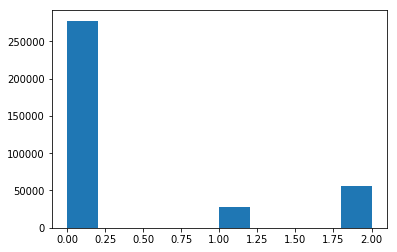

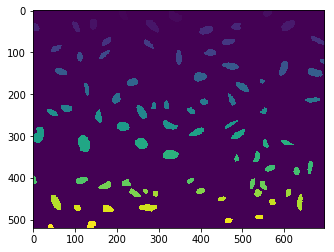

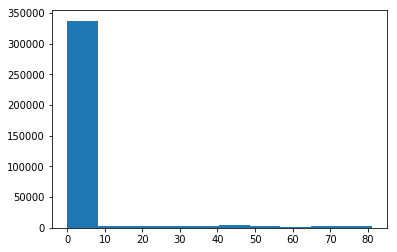

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png


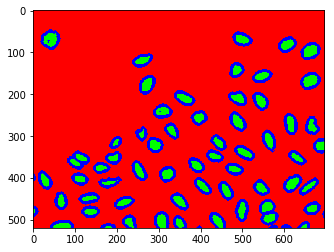

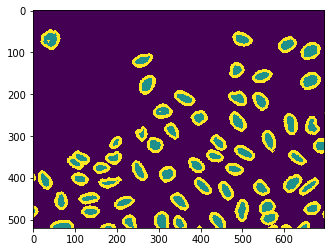

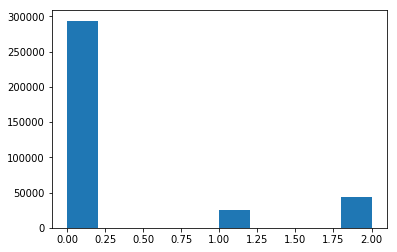

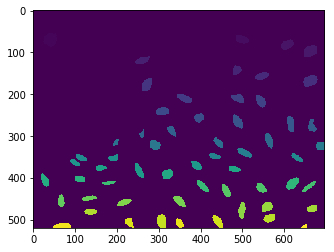

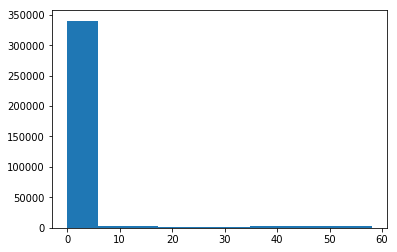

IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png is a low contrast image
  warn('%s is a low contrast image' % fname)


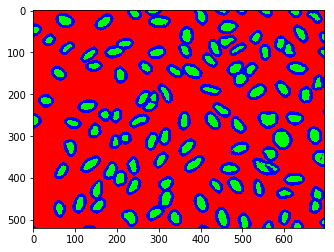

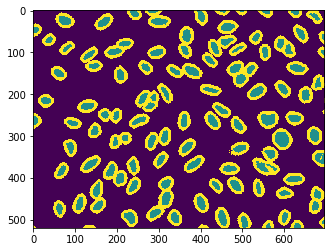

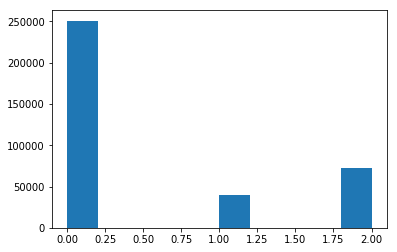

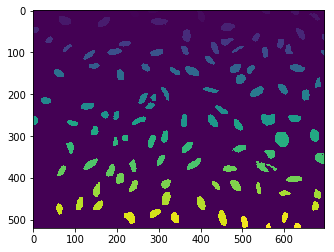

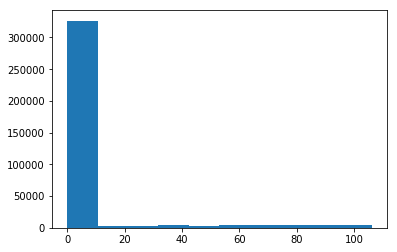

IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325.png is a low contrast image
  warn('%s is a low contrast image' % fname)


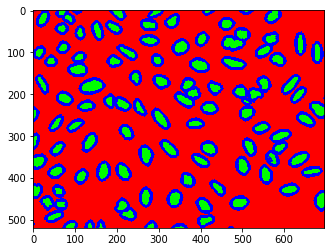

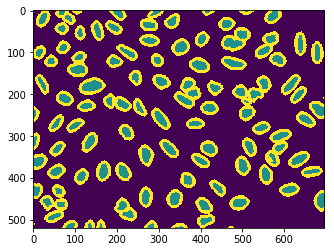

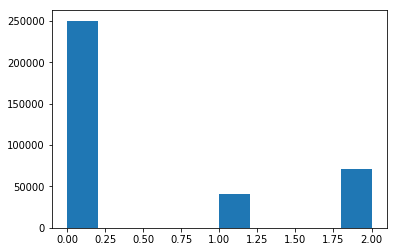

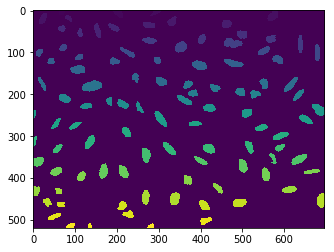

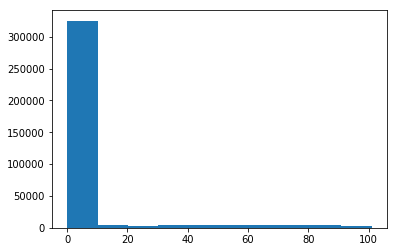

IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


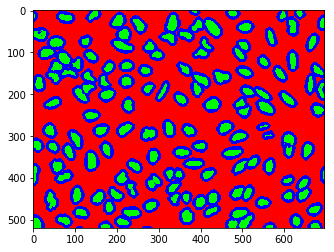

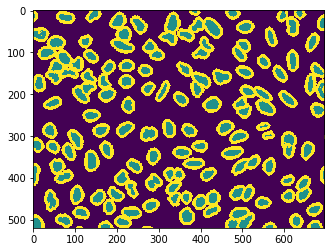

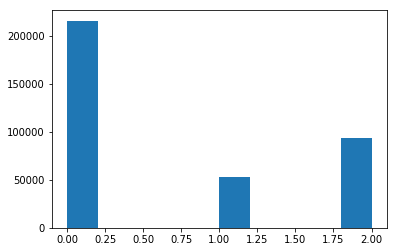

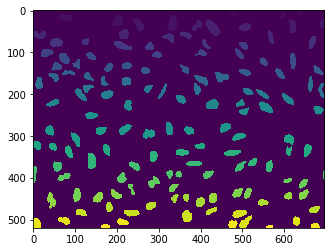

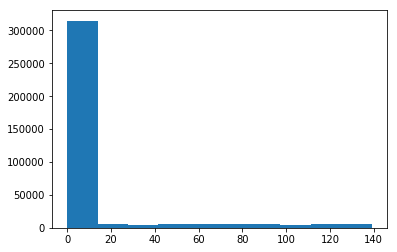

IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


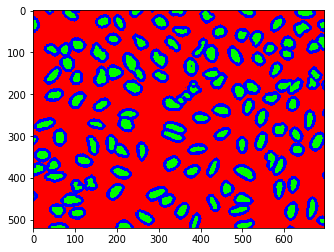

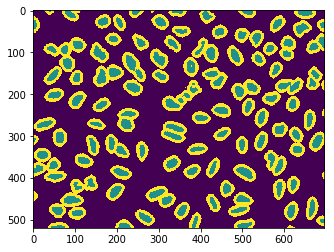

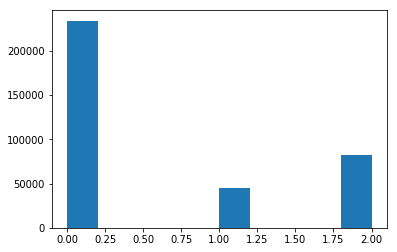

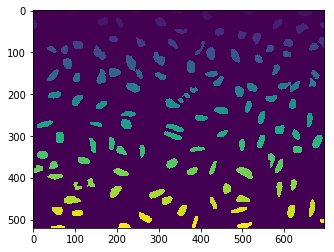

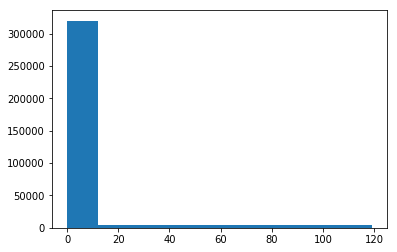

IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD.png is a low contrast image
  warn('%s is a low contrast image' % fname)


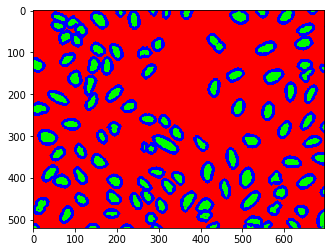

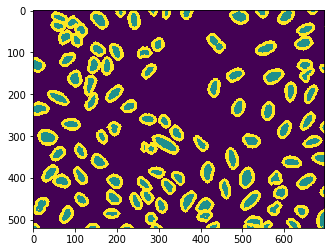

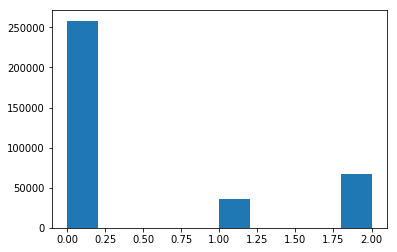

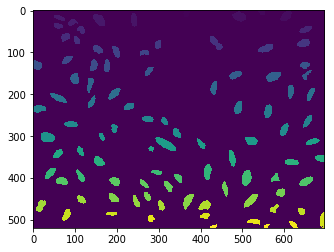

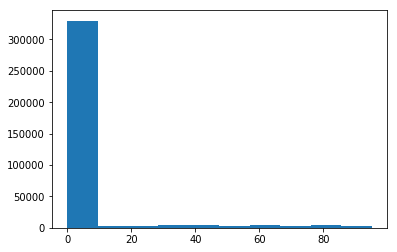

IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.png is a low contrast image
  warn('%s is a low contrast image' % fname)


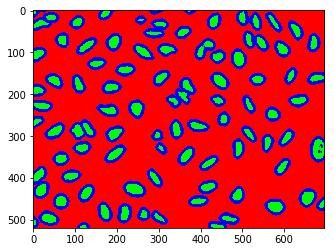

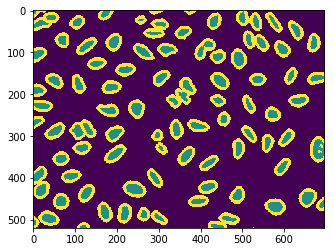

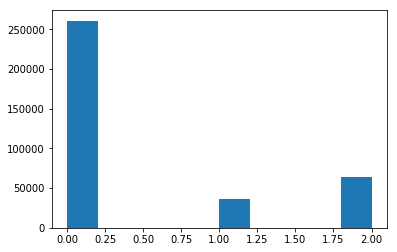

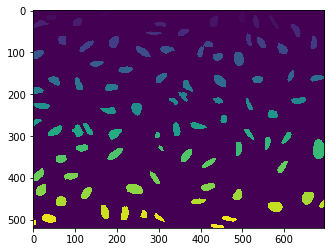

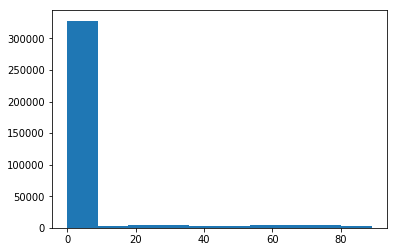

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25.png


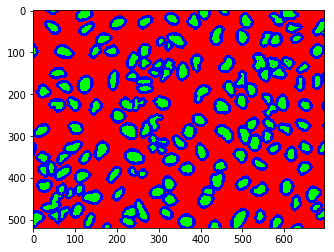

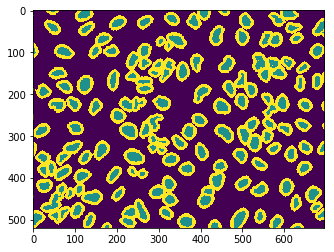

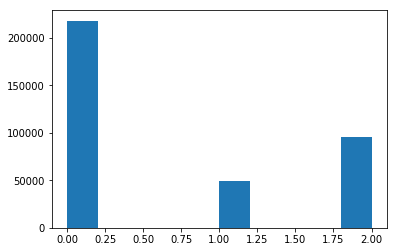

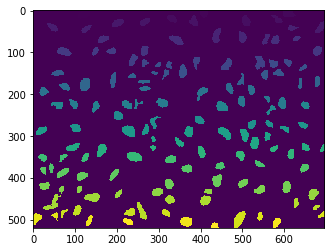

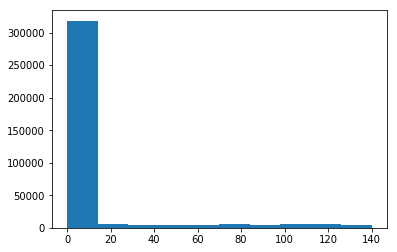

IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25.png is a low contrast image
  warn('%s is a low contrast image' % fname)


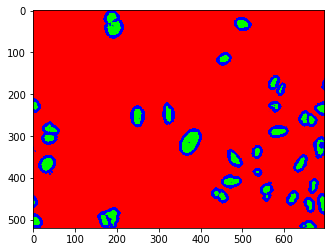

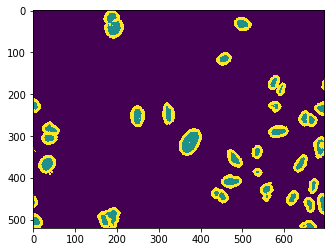

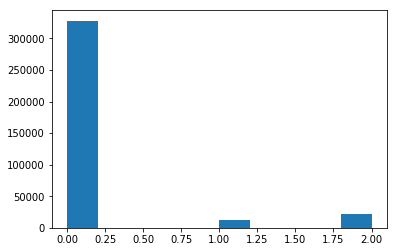

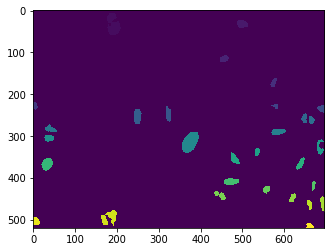

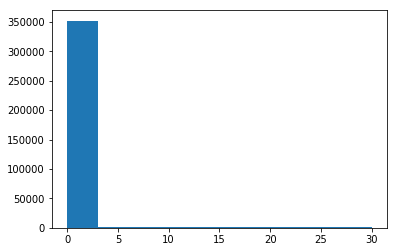

IXMtest_D10_s2_w1BB72A093-72AB-476C-9513-2FF43BFB2134.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


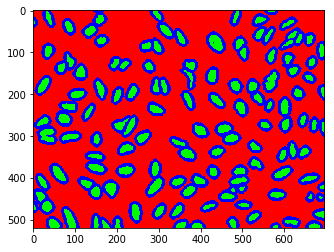

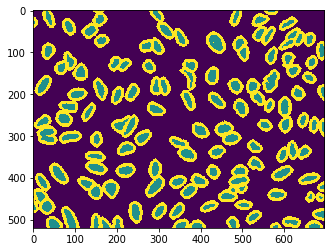

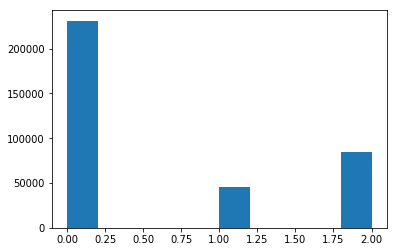

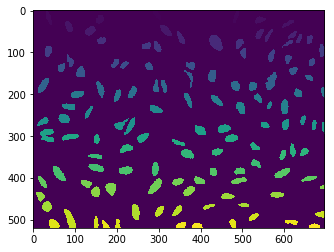

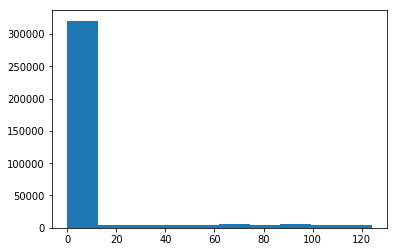

IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_D10_s2_w1BB72A093-72AB-476C-9513-2FF43BFB2134.png is a low contrast image
  warn('%s is a low contrast image' % fname)


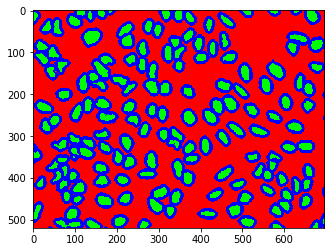

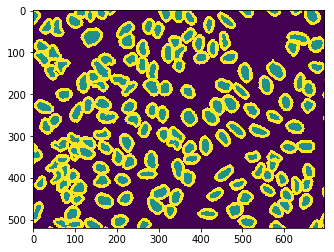

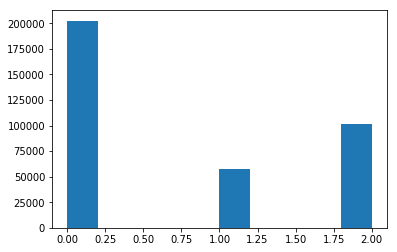

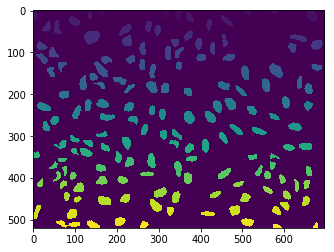

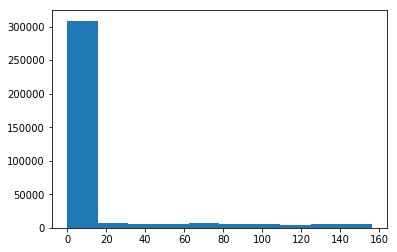

IXMtest_E07_s1_w1641C6847-142B-463F-8B08-5B3296615572.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


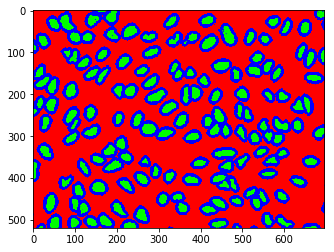

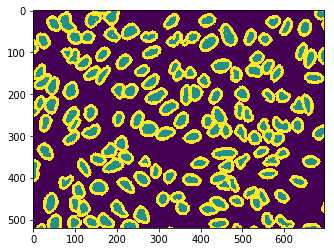

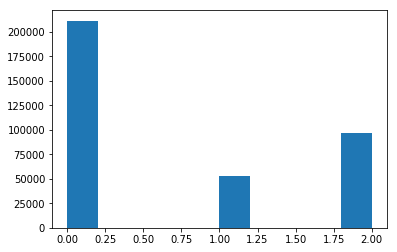

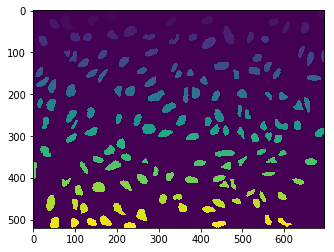

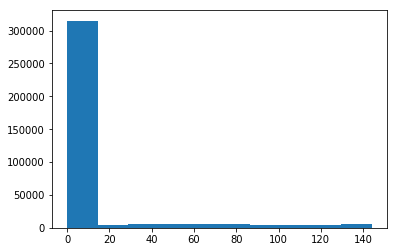

IXMtest_F03_s5_w1FE22EC7D-720A-4848-888A-6AFE1E1C85B0.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_E07_s1_w1641C6847-142B-463F-8B08-5B3296615572.png is a low contrast image
  warn('%s is a low contrast image' % fname)


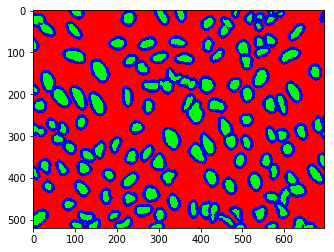

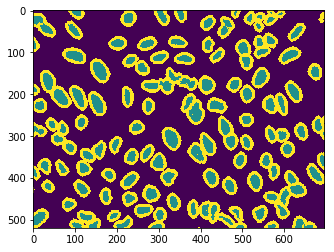

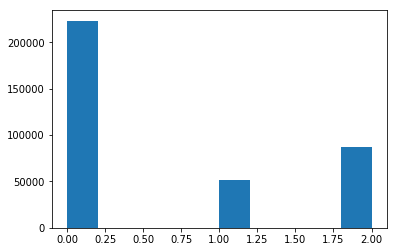

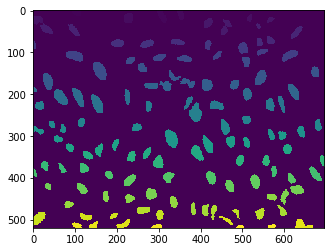

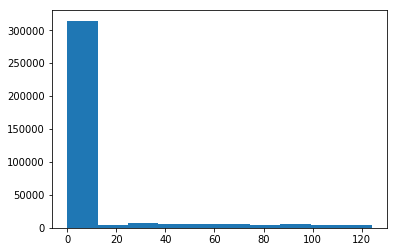

IXMtest_F04_s5_w1D94DA1A2-873C-44B3-80EB-36DC2A97E9A3.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_F03_s5_w1FE22EC7D-720A-4848-888A-6AFE1E1C85B0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


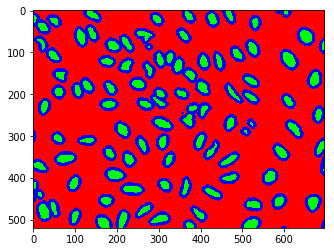

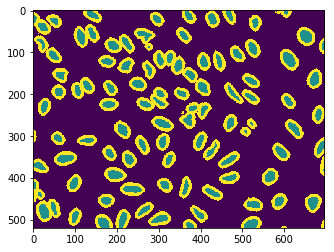

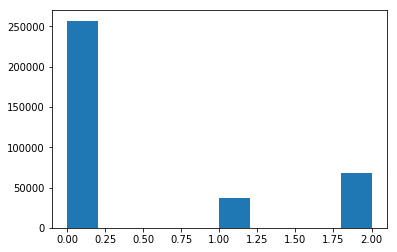

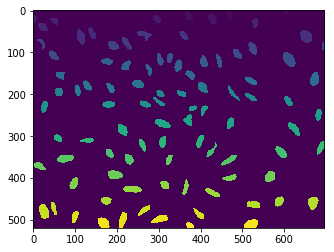

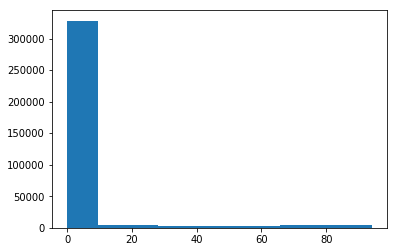

IXMtest_F08_s7_w117D78658-1BA7-495D-9EAA-E4FA155861AC.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_F04_s5_w1D94DA1A2-873C-44B3-80EB-36DC2A97E9A3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


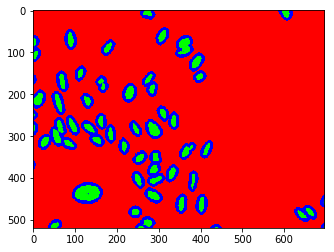

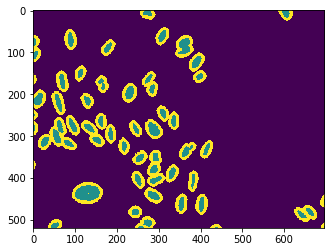

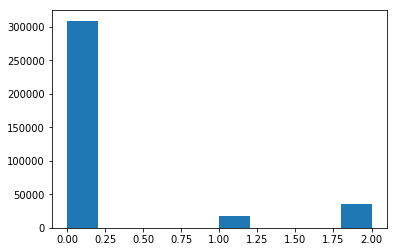

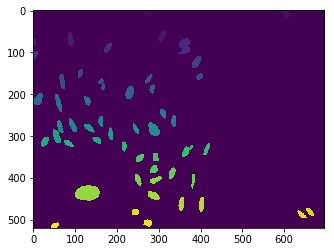

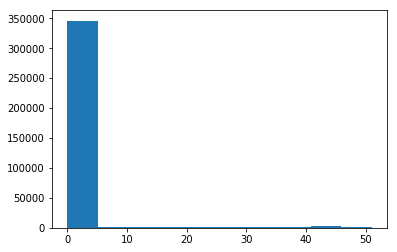

IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_F08_s7_w117D78658-1BA7-495D-9EAA-E4FA155861AC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


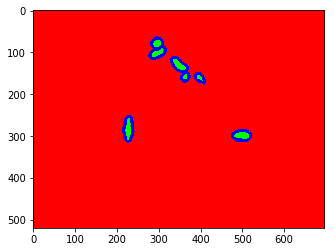

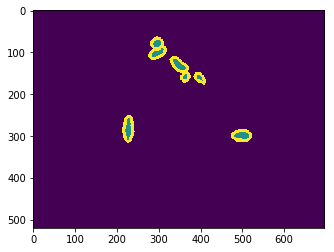

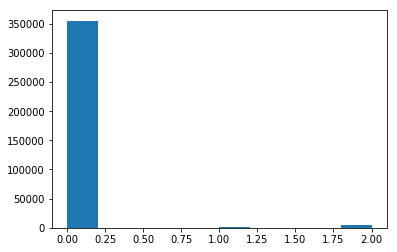

/usr/local/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


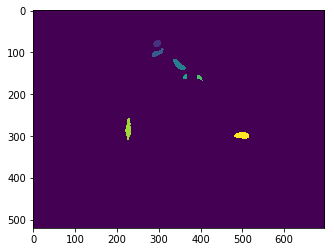

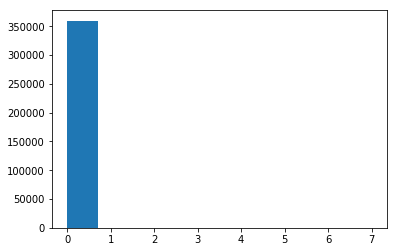

IXMtest_F14_s7_w1E67F2A8A-EEC1-4F01-A1E2-0ECFC639637F.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


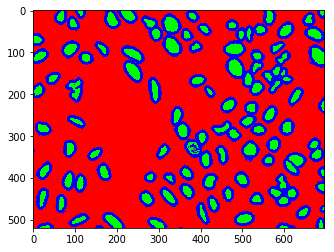

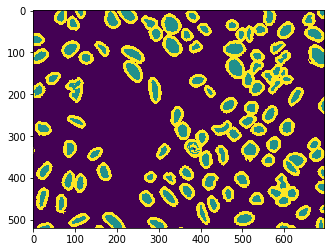

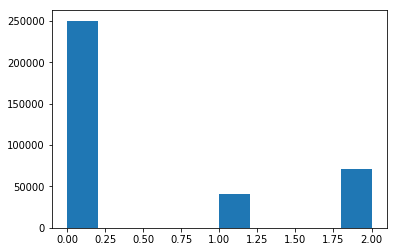

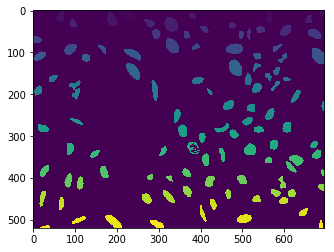

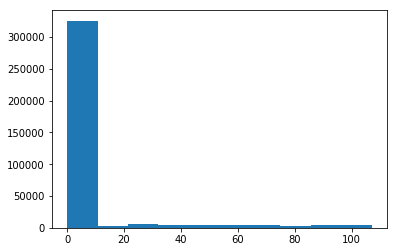

IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_F14_s7_w1E67F2A8A-EEC1-4F01-A1E2-0ECFC639637F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


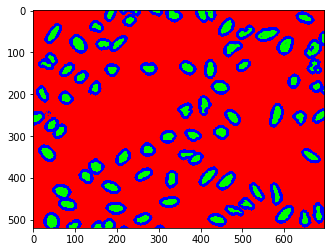

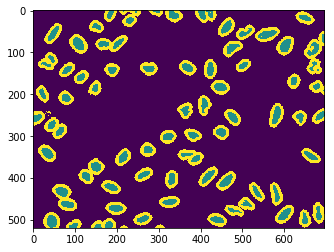

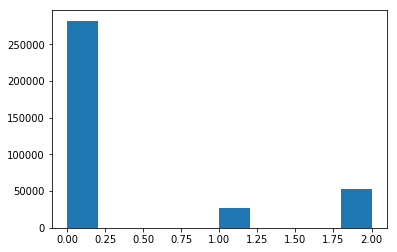

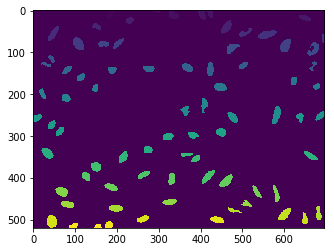

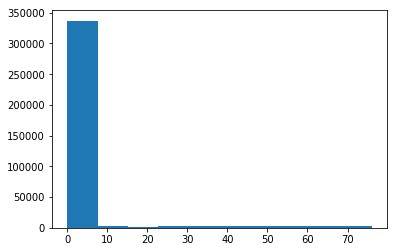

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G06_s7_w19444140C-EF22-42DE-863A-514D836BE850.png


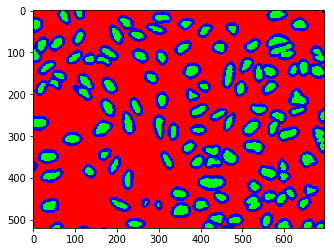

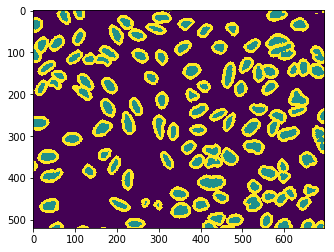

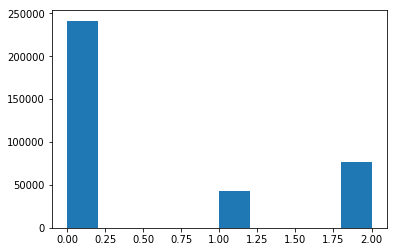

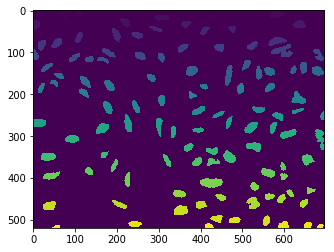

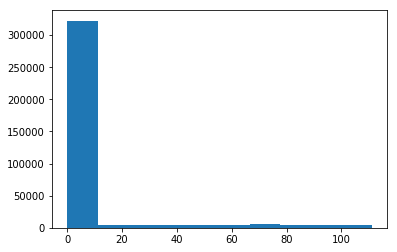

IXMtest_I03_s4_w1C724E24D-7AD5-4166-A810-DC75A825495D.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_G06_s7_w19444140C-EF22-42DE-863A-514D836BE850.png is a low contrast image
  warn('%s is a low contrast image' % fname)


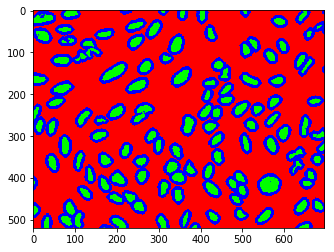

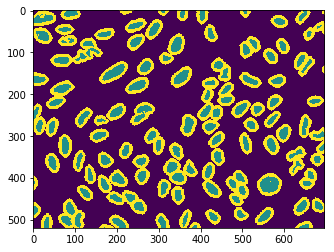

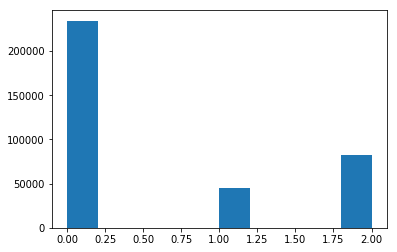

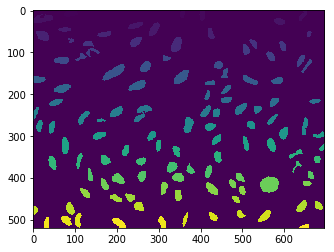

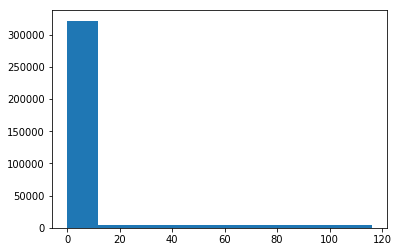

IXMtest_I12_s1_w18A06F07F-CD8F-4056-B041-3967BE48AD78.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_I03_s4_w1C724E24D-7AD5-4166-A810-DC75A825495D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


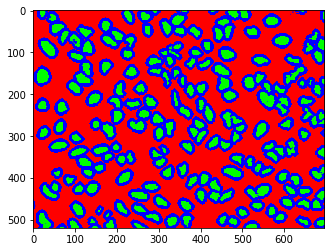

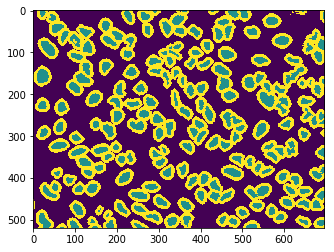

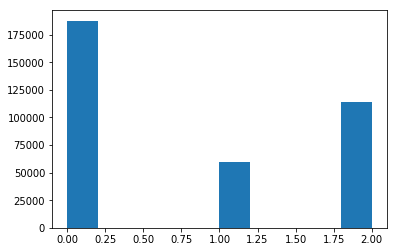

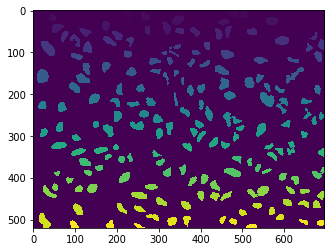

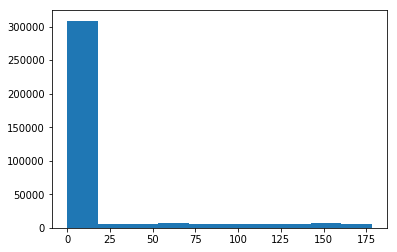

IXMtest_I17_s6_w1EB7CA00F-DF95-466C-BF8C-6304B6A4974E.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_I12_s1_w18A06F07F-CD8F-4056-B041-3967BE48AD78.png is a low contrast image
  warn('%s is a low contrast image' % fname)


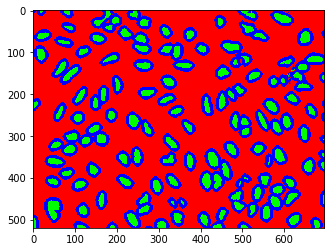

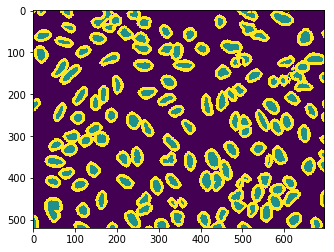

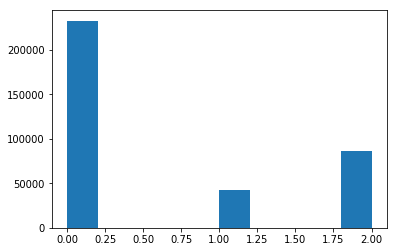

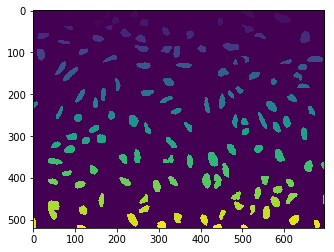

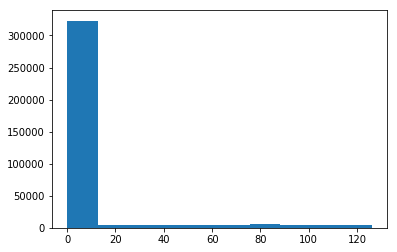

IXMtest_I17_s7_w1BB3D534E-DF08-4F21-BAC6-6B105BB40AF9.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_I17_s6_w1EB7CA00F-DF95-466C-BF8C-6304B6A4974E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


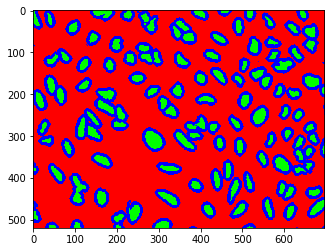

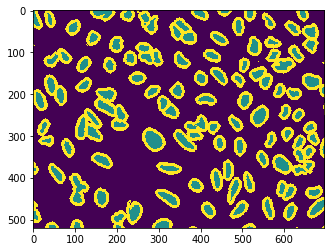

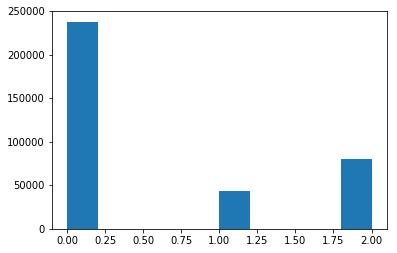

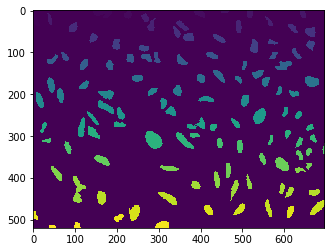

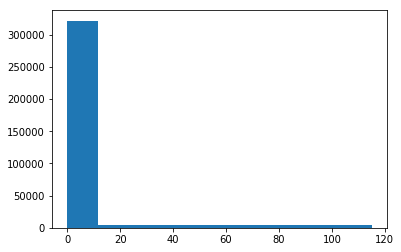

IXMtest_I23_s5_w1E3053D6B-8CEF-48E3-A6A5-2F0D7C1AA177.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_I17_s7_w1BB3D534E-DF08-4F21-BAC6-6B105BB40AF9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


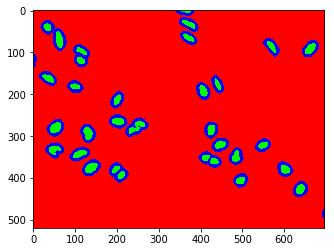

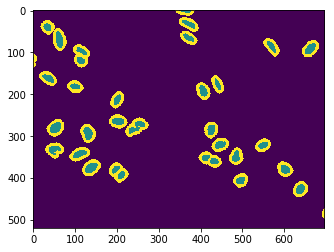

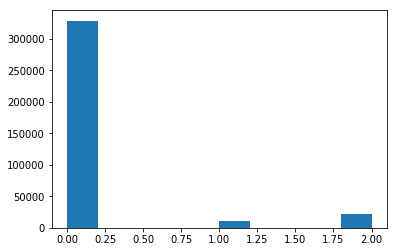

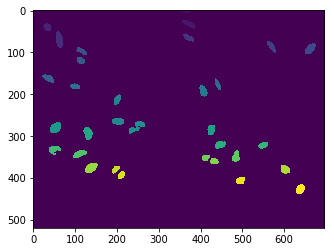

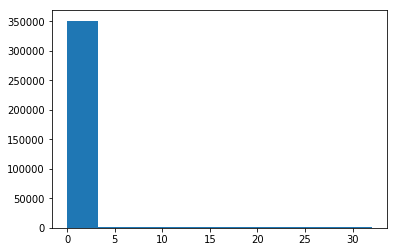

IXMtest_J16_s8_w1AD7BC3EB-6A29-4A53-AA59-E39653839B0D.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_I23_s5_w1E3053D6B-8CEF-48E3-A6A5-2F0D7C1AA177.png is a low contrast image
  warn('%s is a low contrast image' % fname)


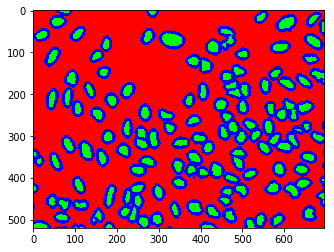

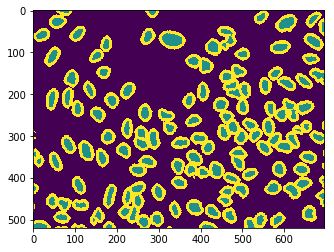

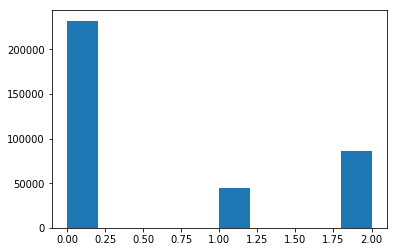

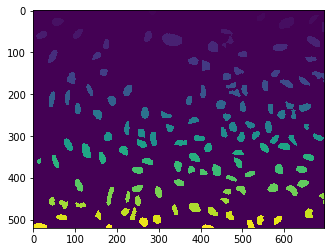

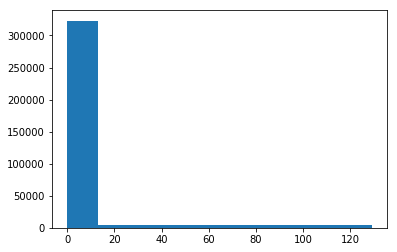

IXMtest_J17_s1_w19E7BCD2F-6D7E-4B39-9154-F93E4D539183.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_J16_s8_w1AD7BC3EB-6A29-4A53-AA59-E39653839B0D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


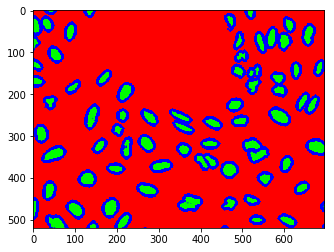

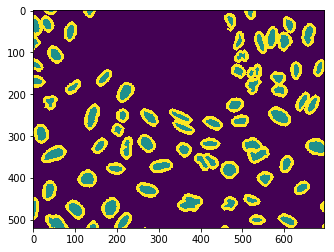

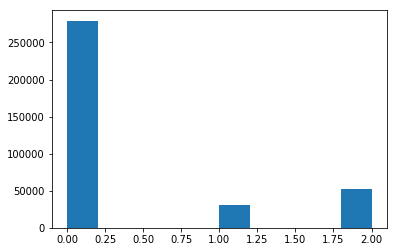

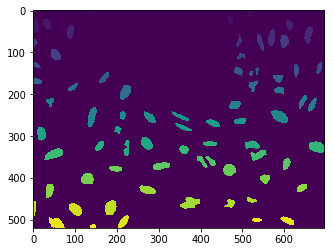

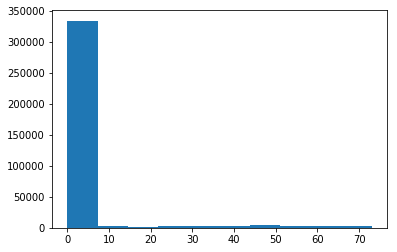

IXMtest_K01_s3_w1054711D8-52CF-4672-B3A0-EC9EC2E681C4.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_J17_s1_w19E7BCD2F-6D7E-4B39-9154-F93E4D539183.png is a low contrast image
  warn('%s is a low contrast image' % fname)


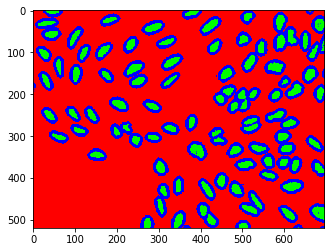

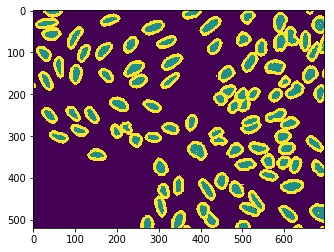

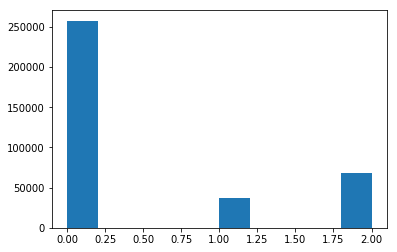

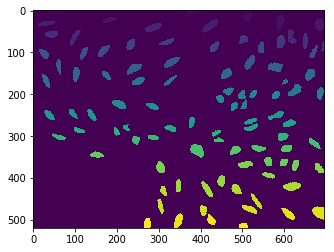

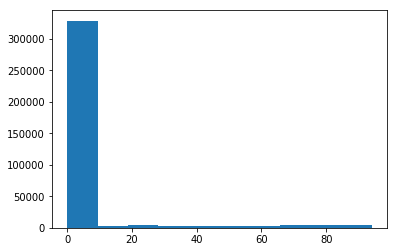

IXMtest_K01_s5_w1A3DE001A-72D6-4321-8B25-4300AB0207AC.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_K01_s3_w1054711D8-52CF-4672-B3A0-EC9EC2E681C4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


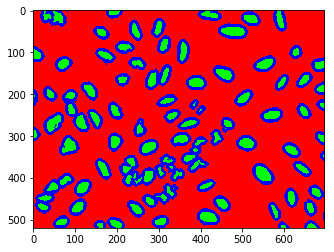

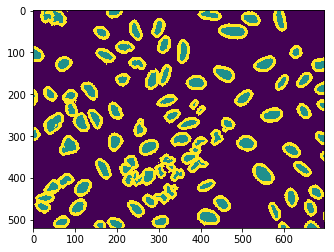

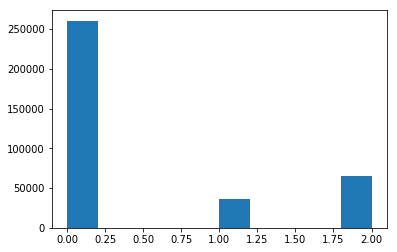

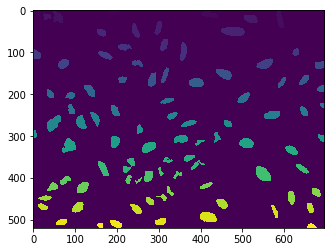

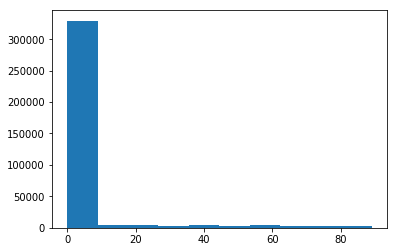

IXMtest_K03_s5_w1DC4CE558-042C-482E-8CAE-FCCB57AA9A55.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_K01_s5_w1A3DE001A-72D6-4321-8B25-4300AB0207AC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


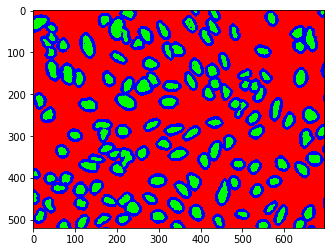

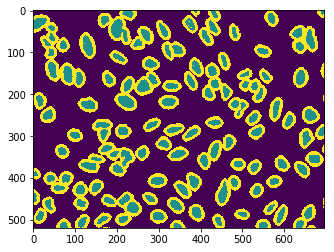

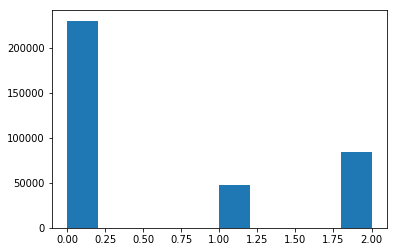

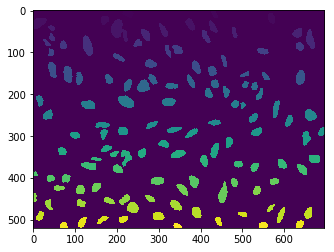

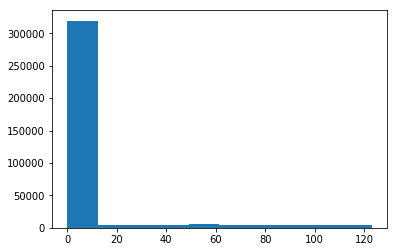

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_K03_s5_w1DC4CE558-042C-482E-8CAE-FCCB57AA9A55.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_K05_s9_w1647AEF60-D7B0-4D83-AFA5-2B05E968468F.png


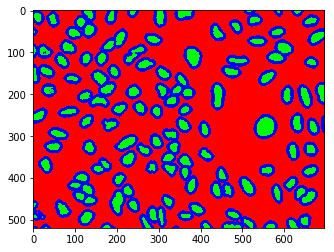

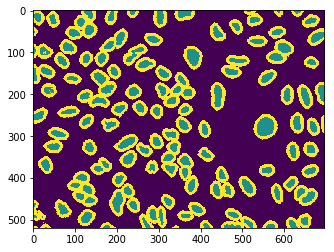

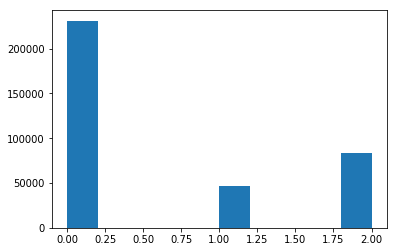

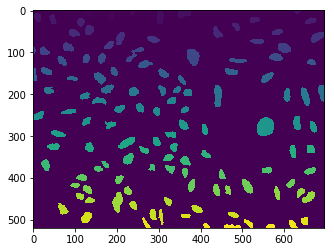

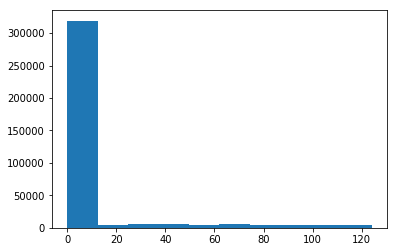

IXMtest_K17_s5_w1BB3AD9D7-3A85-458C-AB1C-07A816C2C203.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_K05_s9_w1647AEF60-D7B0-4D83-AFA5-2B05E968468F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


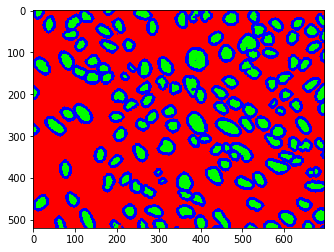

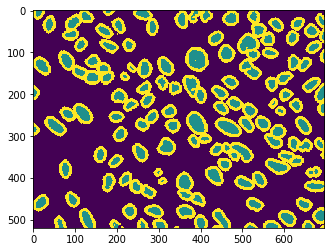

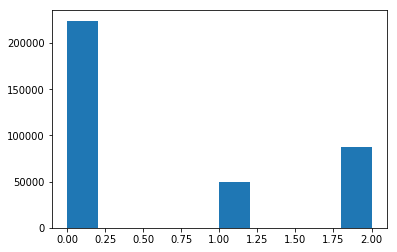

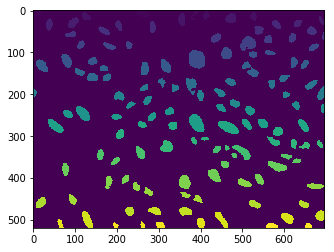

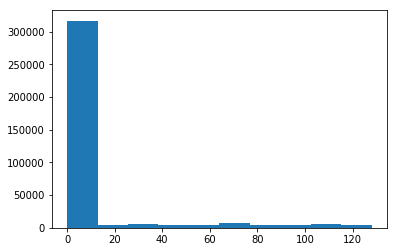

IXMtest_L06_s5_w1610AE208-D6E8-4DC4-AC19-D26284AA8556.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_K17_s5_w1BB3AD9D7-3A85-458C-AB1C-07A816C2C203.png is a low contrast image
  warn('%s is a low contrast image' % fname)


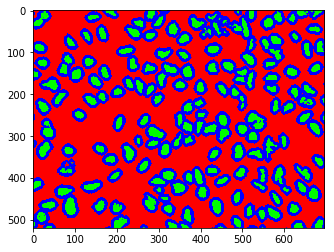

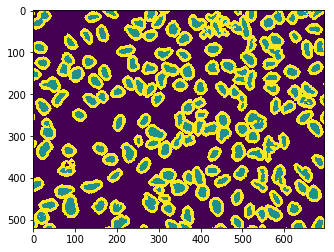

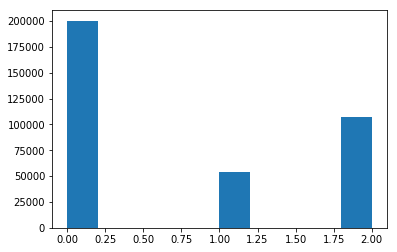

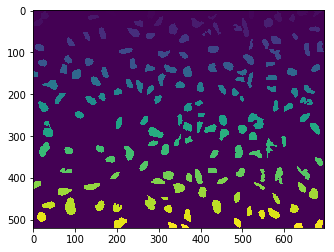

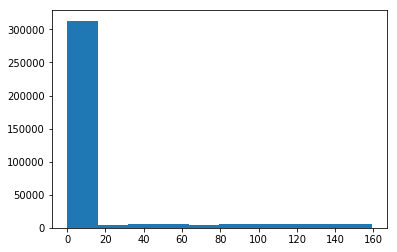

IXMtest_M12_s7_w193E9BA0F-274A-4EE8-A0F0-6A58471A333A.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_L06_s5_w1610AE208-D6E8-4DC4-AC19-D26284AA8556.png is a low contrast image
  warn('%s is a low contrast image' % fname)


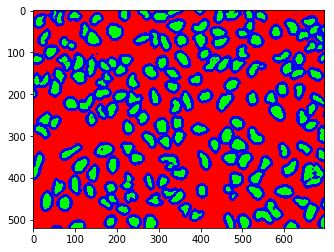

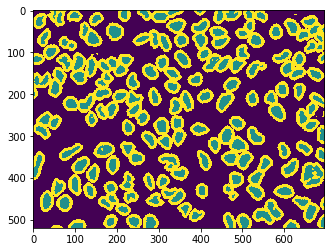

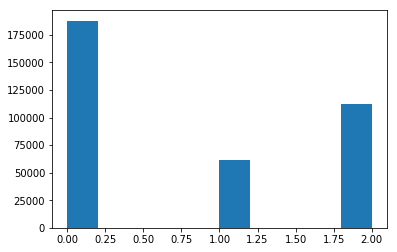

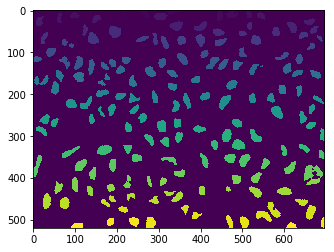

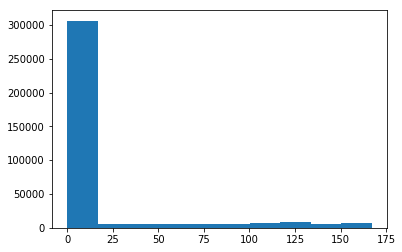

IXMtest_N07_s5_w1D30ED7AB-503E-479D-B5BC-B66472568DE2.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_M12_s7_w193E9BA0F-274A-4EE8-A0F0-6A58471A333A.png is a low contrast image
  warn('%s is a low contrast image' % fname)


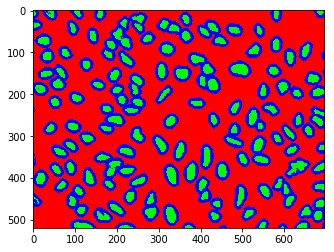

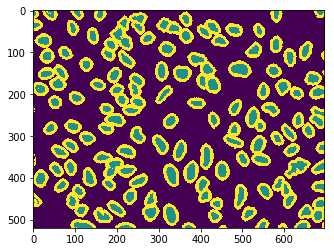

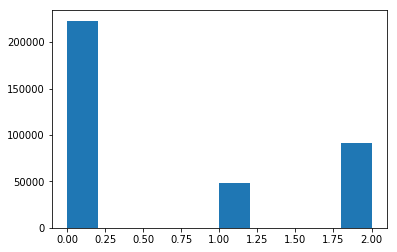

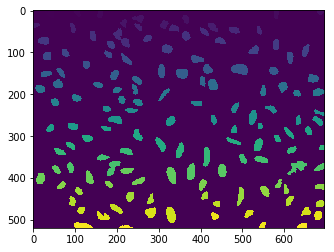

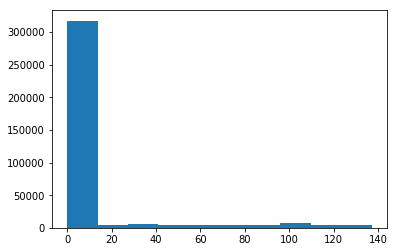

IXMtest_N08_s2_w159DEEDD5-2882-4F9E-9048-F5BD2B918651.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_N07_s5_w1D30ED7AB-503E-479D-B5BC-B66472568DE2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


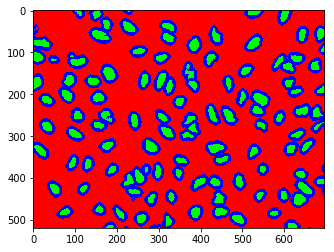

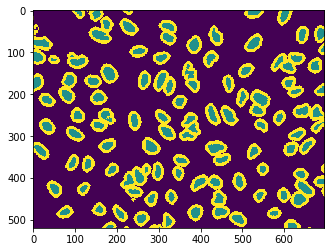

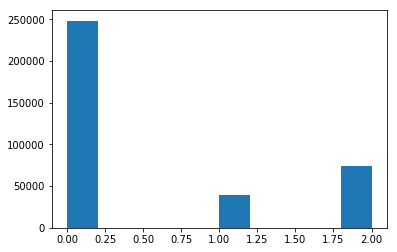

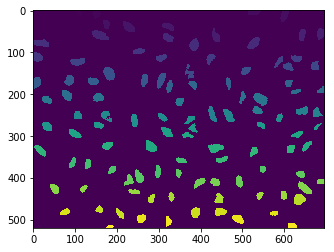

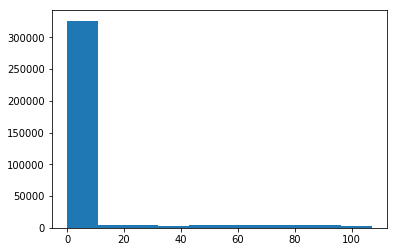

IXMtest_N11_s4_w142A84EA3-47C3-4B49-B6CA-BBC6685BBE1E.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_N08_s2_w159DEEDD5-2882-4F9E-9048-F5BD2B918651.png is a low contrast image
  warn('%s is a low contrast image' % fname)


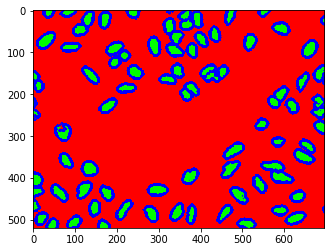

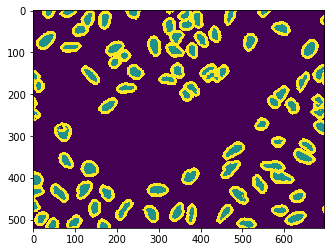

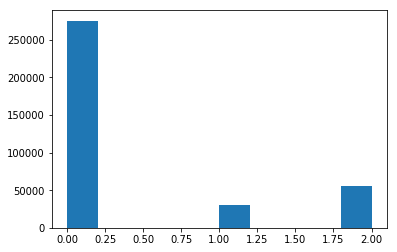

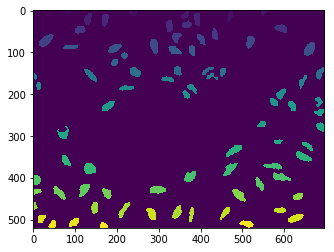

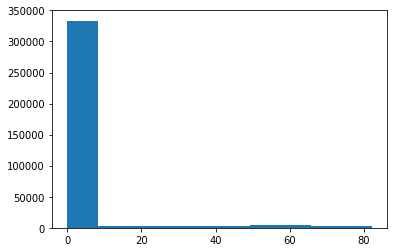

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_N11_s4_w142A84EA3-47C3-4B49-B6CA-BBC6685BBE1E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_N12_s9_w1C98EC3CC-2F8E-4761-A21A-EBF14469AD40.png


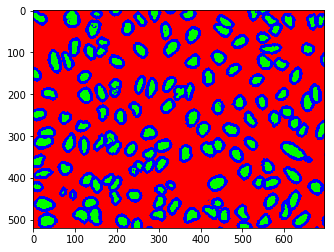

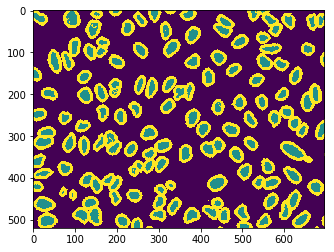

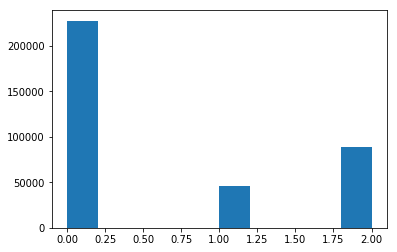

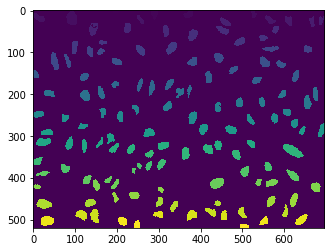

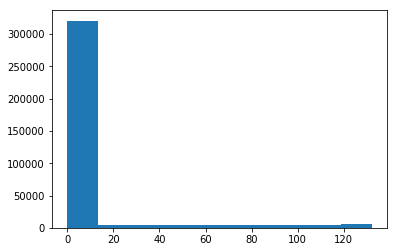

IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_N12_s9_w1C98EC3CC-2F8E-4761-A21A-EBF14469AD40.png is a low contrast image
  warn('%s is a low contrast image' % fname)


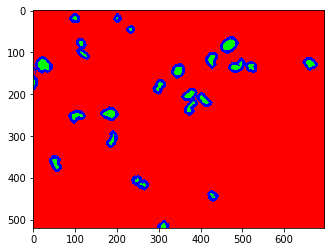

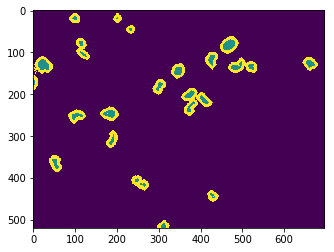

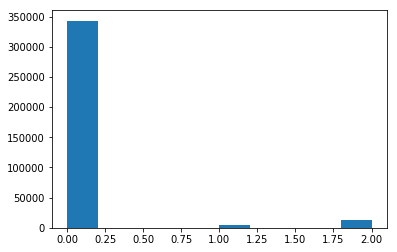

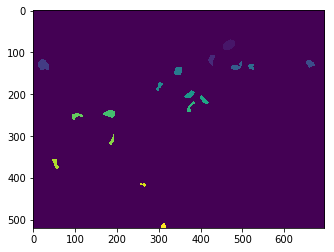

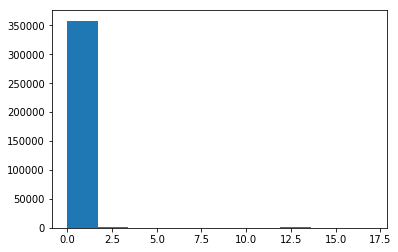

IXMtest_O01_s6_w11A23978B-BAAD-4287-B1F6-FFBCF45C5E2F.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


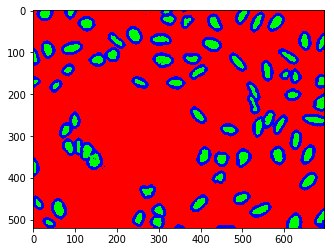

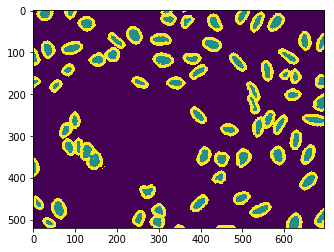

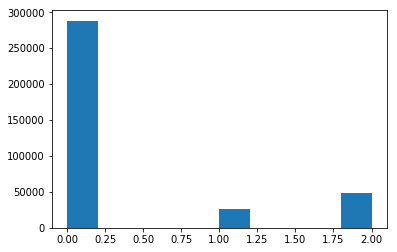

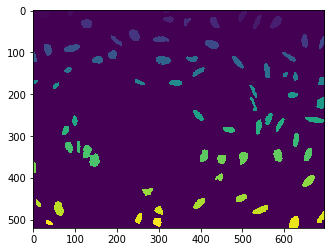

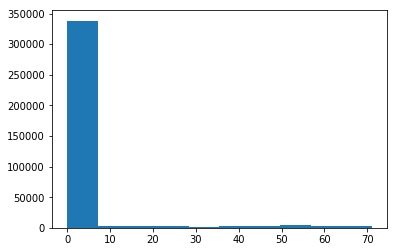

IXMtest_O02_s4_w1814603DA-DD56-44EF-98C5-AFF3B636F986.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_O01_s6_w11A23978B-BAAD-4287-B1F6-FFBCF45C5E2F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


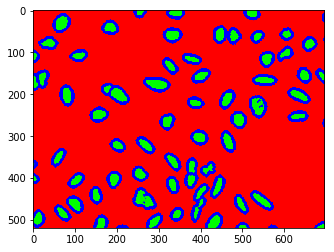

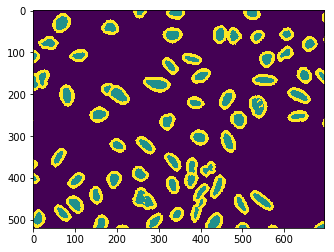

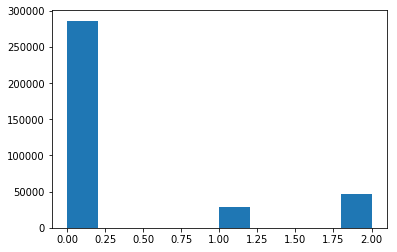

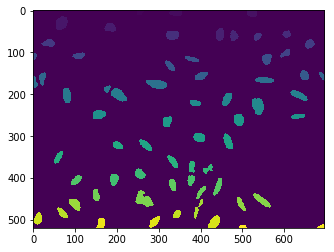

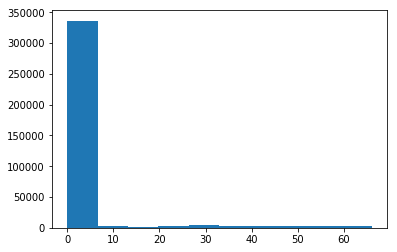

IXMtest_O04_s2_w19A18B0D8-8E8B-4572-A5C0-5C678F3AD54C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_O02_s4_w1814603DA-DD56-44EF-98C5-AFF3B636F986.png is a low contrast image
  warn('%s is a low contrast image' % fname)


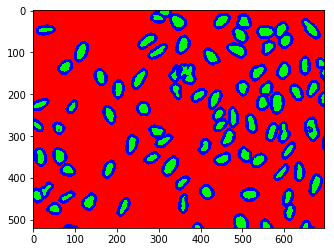

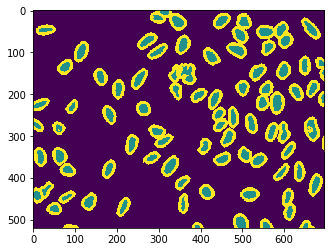

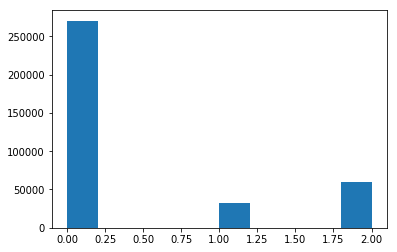

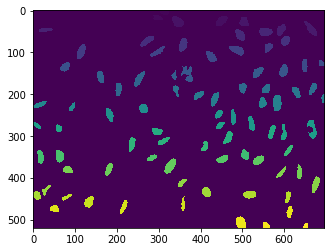

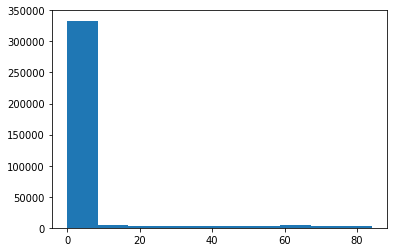

IXMtest_P07_s8_w19D682C29-5685-4A33-8CAA-F0797DD7F021.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_O04_s2_w19A18B0D8-8E8B-4572-A5C0-5C678F3AD54C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


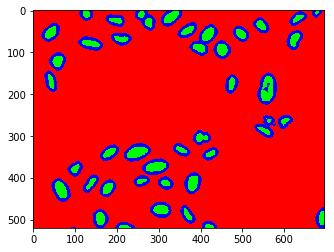

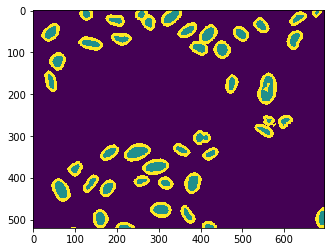

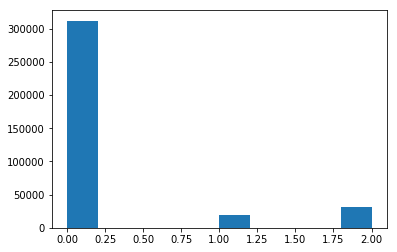

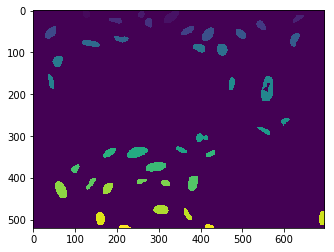

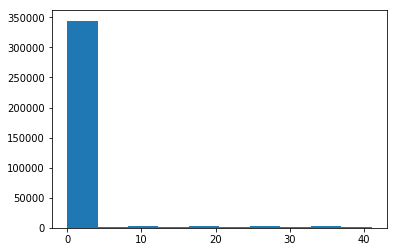

IXMtest_P07_s8_w144364F25-950A-472C-A529-1A9AD0433B6C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_P07_s8_w19D682C29-5685-4A33-8CAA-F0797DD7F021.png is a low contrast image
  warn('%s is a low contrast image' % fname)


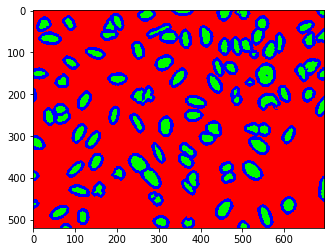

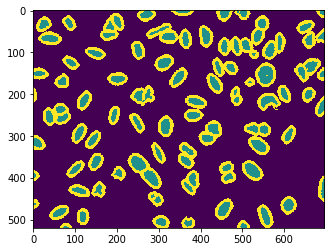

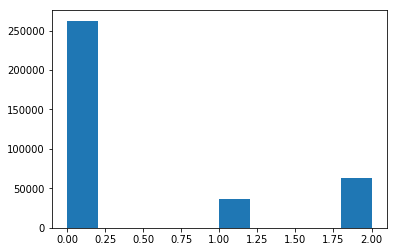

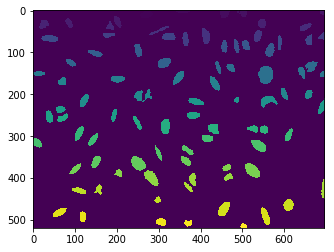

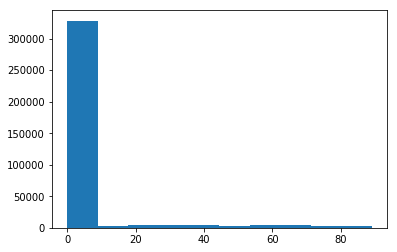

IXMtest_P15_s8_w1D26A5BC7-CF59-4027-B785-85AD33773609.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_P07_s8_w144364F25-950A-472C-A529-1A9AD0433B6C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


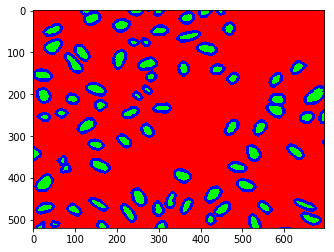

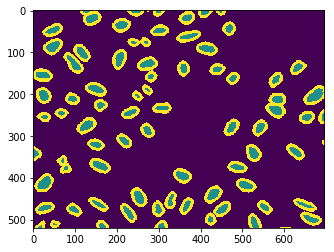

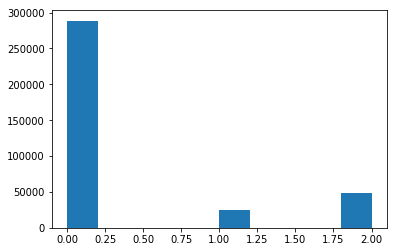

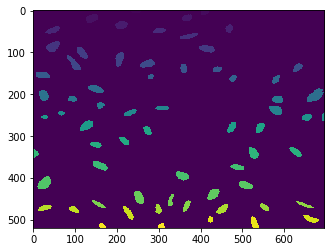

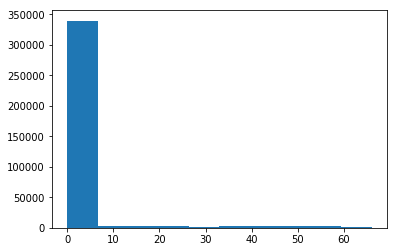

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_P15_s8_w1D26A5BC7-CF59-4027-B785-85AD33773609.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940.png


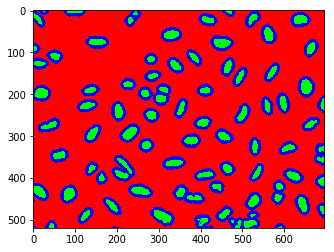

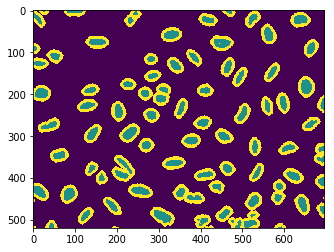

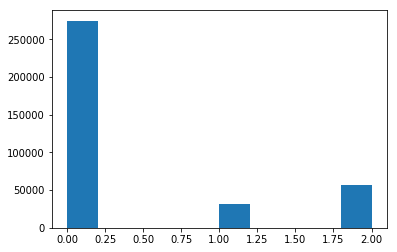

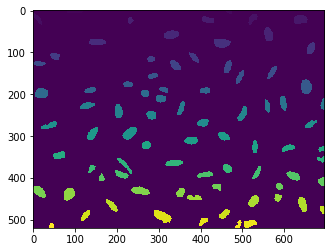

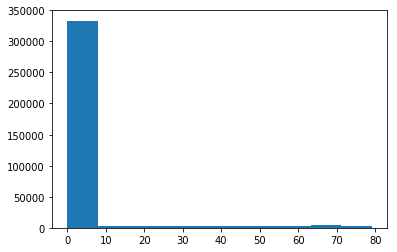

IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940.png is a low contrast image
  warn('%s is a low contrast image' % fname)


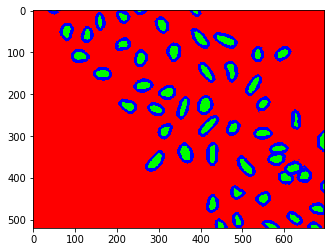

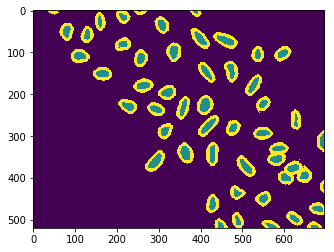

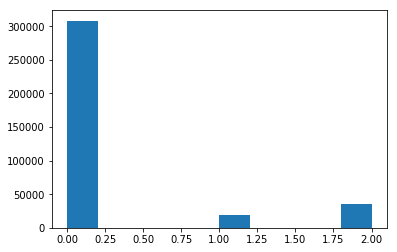

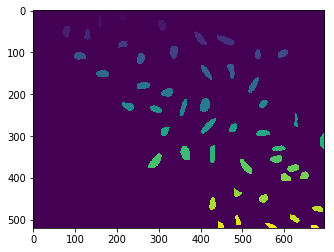

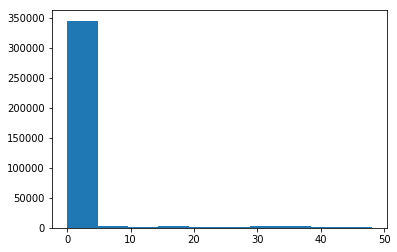

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/segm/IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [8]:
for i in range(len(images)):

    filename = imagebuffer.files[i]
    filename = os.path.basename(filename)
    print(filename)
    
    probmap = predictions[i].squeeze()
    
    plt.imshow(probmap)
    plt.show()
    
    skimage.io.imsave(out_dir_probmap + filename, probmap)
    
    pred = helper.metrics.probmap_to_pred(probmap, boundary_boost_factor)
    
    plt.imshow(pred)
    plt.show()
    
    plt.hist(pred.flatten())
    plt.show()
    
    label = helper.metrics.pred_to_label(pred, cell_min_size)
    
    plt.imshow(label)
    plt.show()
    
    plt.hist(label.flatten())
    plt.show()

    skimage.io.imsave(out_dir_label + filename, label)